In [ ]:
import pandas as pd
df = pd.read_csv("estradiol_database.csv")




Total number of unique words: 1985


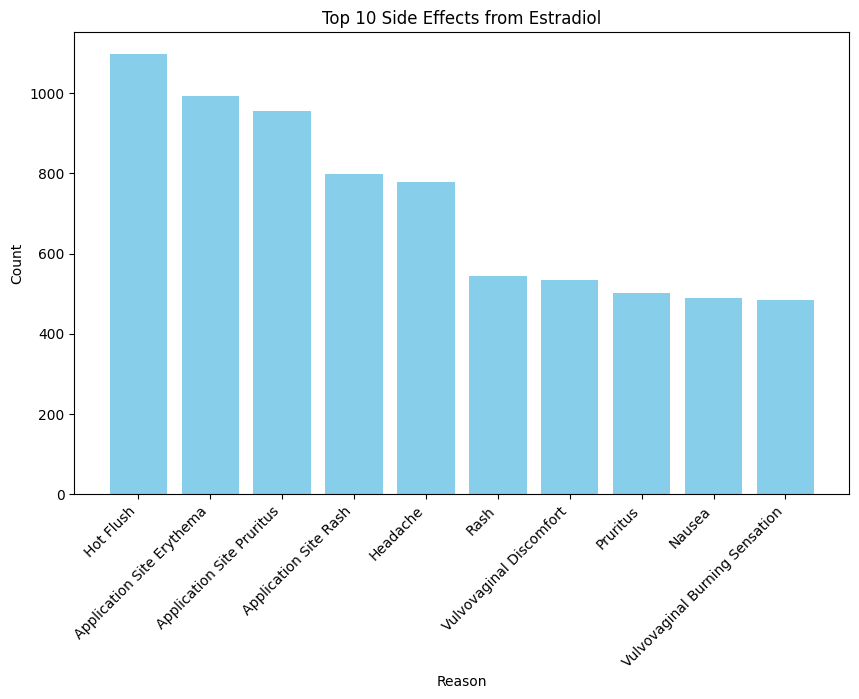

In [ ]:
# what are the top 10 adverse effects of estradiol
from collections import Counter 
from matplotlib import pyplot as plt

#manufacturing problems have been removed since they are 
#not "symptoms"
df = df[~df['Reactions'].str.contains('-', na = False)]
words = ["Product Adhesion Issue", "Drug Ineffective", "Off Label Use",
         "Wrong Technique In Product Usage Process","Product Quality Issue",
         "Device Adhesion Issue"]
manufacturing = "|".join(words)
df = df[~df['Reactions'].str.contains(manufacturing, case=False, na=False)]

all_side_effects = (
    df['Reactions']
    .dropna()
    .astype(str)
    .str.cat(sep=';')
    .split(';')
)

unique_words = sorted(set(all_side_effects))
print(f"Total number of unique words: {len(unique_words)}")

word_counts = Counter(all_side_effects)
top_10 = word_counts.most_common(10)

top_project = pd.DataFrame(top_10, columns=['Reason', 'Count'])



plt.figure(figsize=(10, 6))
plt.bar(top_project['Reason'], top_project['Count'], color = 'skyblue')
plt.title("Top 10 Side Effects from Estradiol")
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

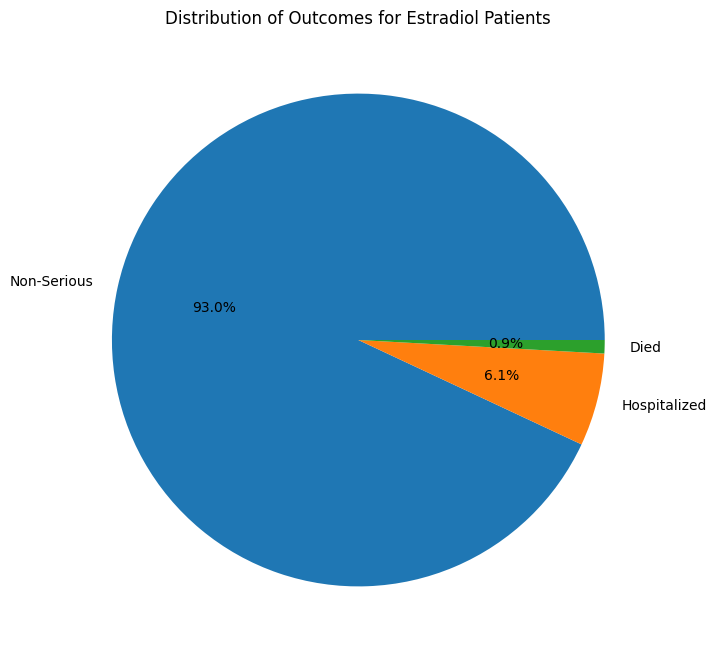

In [7]:
#what percentage died, was hospitalized, or non-serious
outcome_counts = df["Outcomes"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Outcomes for Estradiol Patients")
plt.show()


Reactions
Everything Else    98.323459
Blood Clots         0.743729
Cancer              0.523131
Stroke              0.289928
Heart Attack        0.119753
Name: count, dtype: float64


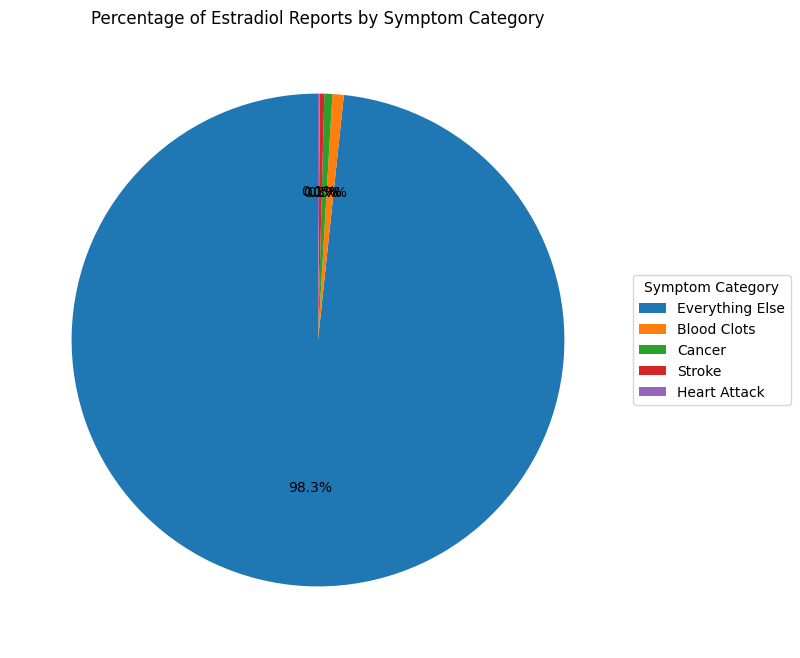

In [13]:
#How many of these reactions were high risk symptoms listed
#from the black box label


reaction_col = 'Reactions'

keywords = {
    "Stroke": ["stroke", "cerebrovascular"],
    "Cancer": ["cancer", "neoplasm", "tumor"],
    "Blood Clots": ["blood clot", "thrombosis", "embolism"],
    "Heart Attack": ["heart attack", "myocardial infarction"]
}

def classify_reaction(text):
    text = str(text).lower()
    for category, words in keywords.items():
        if any(word in text for word in words):
            return category
    return "Everything Else"

df['Reactions'] = df[reaction_col].apply(classify_reaction)


category_counts = df['Reactions'].value_counts()
category_percent = (category_counts / category_counts.sum()) * 100

print(category_percent)

plt.figure(figsize=(8, 8))

wedges, texts, autotexts = plt.pie(
    category_percent,
    autopct='%1.1f%%',
    startangle=90
)
plt.legend(
    wedges,
    category_percent.index,
    title="Symptom Category",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title("Percentage of Estradiol Reports by Symptom Category")
plt.show()
